In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
comments=pd.read_csv('C:\\Users\\sairahul\\Data analysis project\\Youtube_data_Set\\GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [37]:
#comments.head()

In [38]:
#!pip install textblob

In [39]:
from textblob import TextBlob

In [40]:
TextBlob('Its more accurate to call it the M+ (1000) be...').sentiment.polarity

0.45000000000000007

In [41]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [42]:
comments.dropna(inplace=True)
comments.shape

(718424, 4)

In [43]:
polarity=[]
for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)
    

In [44]:
comments['polarity']=polarity

In [45]:
#comments.head(20)

In [46]:
#!pip install wordcloud

In [47]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)

In [48]:
def wordcloud_representation(val):
    comments_p=comments[comments['polarity']==val]
    total_comments=' '.join(comments_p['comment_text'])
    wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)
    plt.figure(figsize=(15,5))
    plt.imshow(wordcloud)
    plt.axis('off')

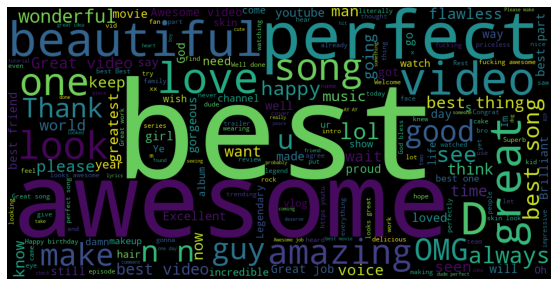

In [49]:
comments_positive=wordcloud_representation(1)

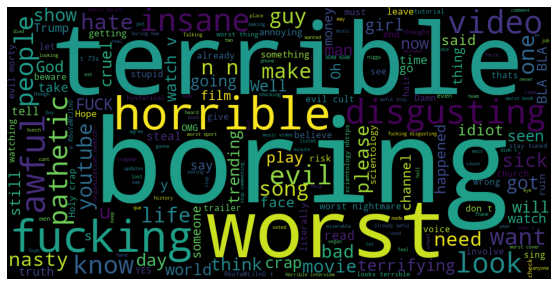

In [50]:
comments_negative=wordcloud_representation(-1)

In [51]:
#Emoji analysis

In [52]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


In [53]:
#!pip install emoji

In [54]:
import emoji

In [55]:
#comment=str(comments['comment_text'][1])
#comment

In [56]:
#[c for c in comment if c in emoji.UNICODE_EMOJI_ENGLISH]

In [57]:
emoji_str=''
for i in comments['comment_text']:
    i=str(i)
    lis=[c for c in i if c in emoji.UNICODE_EMOJI_ENGLISH]
    for ele in lis:
        emoji_str=emoji_str+ele

In [58]:
len(emoji_str)

333278

In [59]:
result={}
for i in set(emoji_str):
    #print(i)
    result[i]=emoji_str.count(i)

In [60]:
#result.items()

In [61]:
final={}
for key,value in sorted(result.items(),key= lambda item:item[1]):
    final[key]=value
#final    

In [62]:
keys=[*final.keys()]
#keys

In [63]:
values=[*final.values()]
#values

In [64]:
Df=pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})

In [65]:
#!pip install plotly

In [66]:
import plotly.graph_objs as go
from plotly.offline import iplot,plot

In [71]:
trace=go.Bar(
x=Df['chars'],
y=Df['num']
)

iplot([trace])